In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Capstone/ForEx_Dataset.csv")

In [ ]:
df.head(5)

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
0,29-12-2023,83.186,56.679,62.821,98.871,12.3174,88.962,105.922,10.6569,0.005405,...,0.6117,4.8961,1.5014,0.2990,21.11,0.9321,22.18,2.82,2.32,220.640
1,28-12-2023,83.169,56.796,62.850,98.448,12.3411,89.245,105.874,10.6433,0.005341,...,0.6122,4.8998,1.4945,0.2939,21.20,0.9397,22.18,2.82,2.32,220.578
2,27-12-2023,83.263,56.993,63.025,98.722,12.4011,89.069,106.534,10.6607,0.005414,...,0.6129,4.9187,1.4962,0.2949,21.39,0.9087,22.20,2.83,2.31,220.819
3,26-12-2023,83.158,56.747,63.018,97.398,12.3155,89.258,105.827,10.6495,0.005399,...,0.6094,4.8957,1.4989,0.2945,21.21,0.9074,22.17,2.84,2.31,220.508
4,25-12-2023,83.164,56.518,62.756,97.086,12.2775,89.081,105.527,10.6451,0.005377,...,0.6076,4.8777,1.5009,0.2976,21.06,0.9039,22.17,2.83,2.32,220.588


In [ ]:
df = df[['Date', 'USD']]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-332-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df_month = df.resample('MS').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  216


,USD
Date,
2006-01-01,44.533333
2006-02-01,44.647250
2006-03-01,44.646875
2006-04-01,45.140000
2006-05-01,45.434286


<Axes: xlabel='Date'>

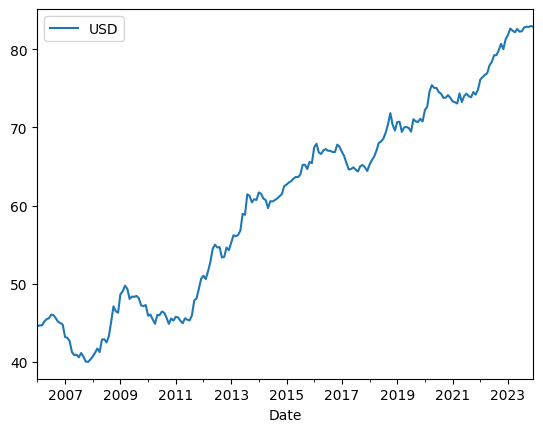

In [ ]:
df_month.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=df_month['USD']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  0.5065263772332883
p-value 0.9850701162027822
critical values 445.3245797145749
Reject the null hypotheise , it mean data is not stationary


In [ ]:
df_month['USD_1']=df_month['USD']-df_month['USD'].shift(1)

<Axes: xlabel='Date'>

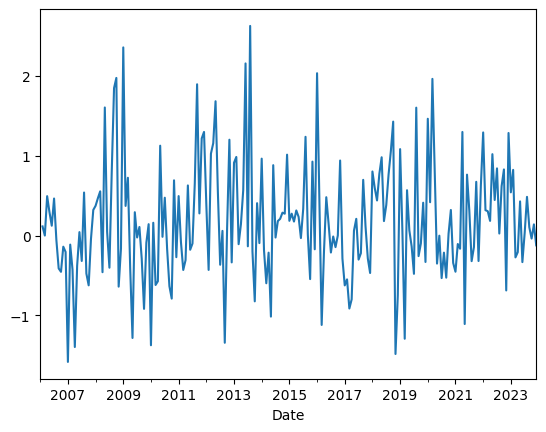

In [ ]:
df_month['USD_1'].plot()

In [ ]:
x=df_month['USD_1'].dropna()
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -13.400599861320824
p-value 4.5744438481676e-25
critical values 443.0499990045036
fail to reject null hypothese h1 , it mean data is stationary


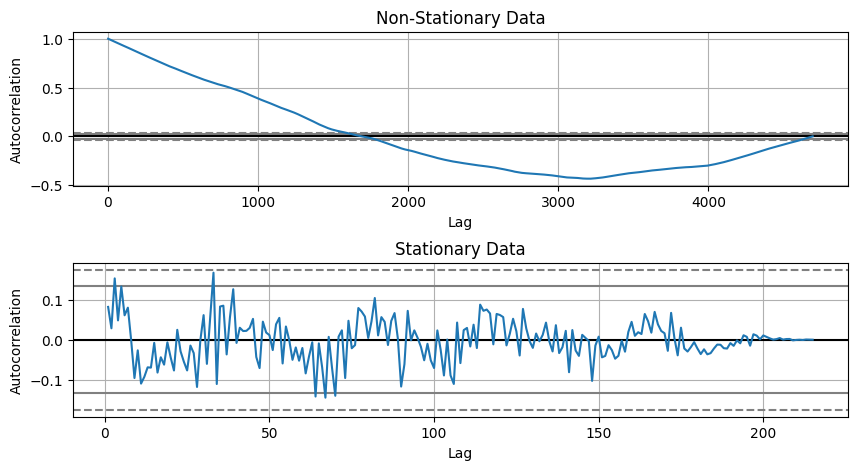

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df, ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(x, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.show()

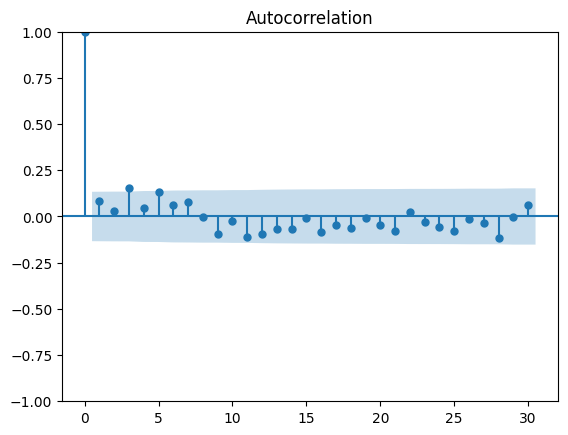

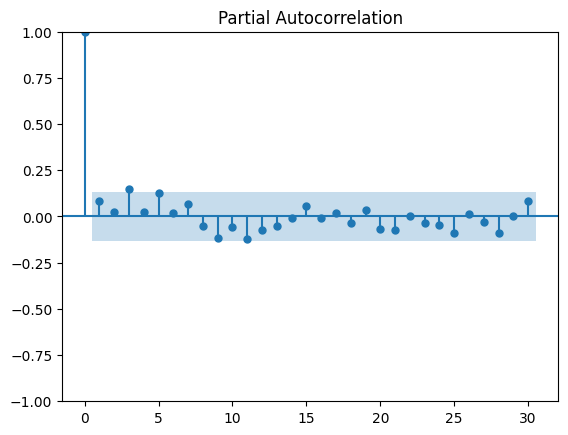

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plot_acf(df_month['USD_1'].iloc[1:],lags=30)
plot_pacf(df_month['USD_1'].iloc[1:],lags=30)
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

model = auto_arima(x , m = 12 , d = 1 ,seasonal = True , max_order=8, test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=606.245, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=556.699, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=604.246, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=554.889, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=556.684, Time=0.24 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=558.653, Time=0.70 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=517.849, Time=0.11 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=519.548, Time=0.26 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=519.540, Time=0.21 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=521.521, Time=0.82 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=510.898, Time=0.20 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=512.467, Time=0.52 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AI

In [ ]:
df_month.shape

(216, 2)

# **ARIMA Model**

<Axes: xlabel='Date'>

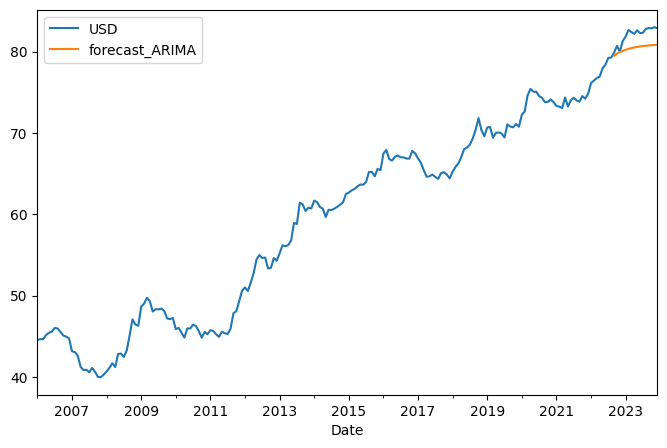

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model =ARIMA(df_month['USD'],order=(4,1,1))
model_fit=model.fit()
df_month['forecast_ARIMA'] = model_fit.predict(start=200, end=216, dynamic= True)
df_month[['USD', 'forecast_ARIMA']].plot(figsize=(8, 5))

# **SARIMA Model**

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_month['USD'],order=(4,1,1),seasonal_order=(4,1,1,7))
result=model.fit()

<Axes: xlabel='Date'>

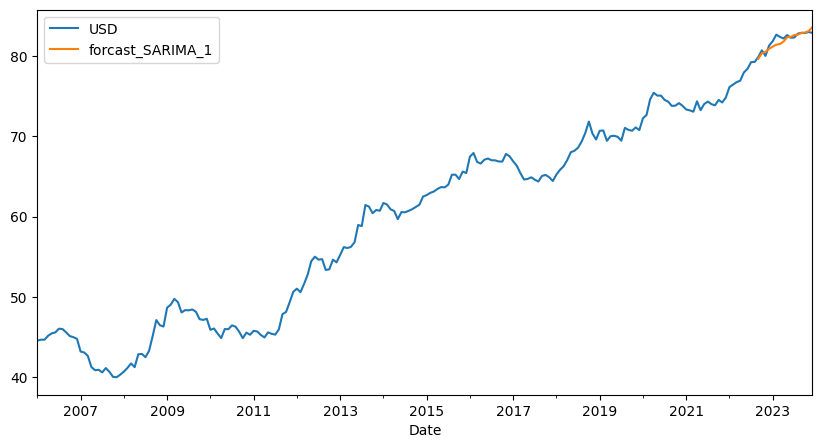

In [ ]:
df_month['forcast_SARIMA_1']=result.predict(start=200, end=216 ,dynamic=True)
df_month[['USD','forcast_SARIMA_1']].plot(figsize=(10, 5))

In [ ]:
predictions = model_fit.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['USD'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['USD'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['USD'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['USD'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['USD'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 94.10 % 

Mean Squared Error :  9.700537604514288 

Mean Absolute Error :  0.7433817376995139 

Root Mean Squared Error :  3.114568606486986 

Mean Absolute Percentage Error : 1.40 %


In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
df_month.shape

(216, 4)

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

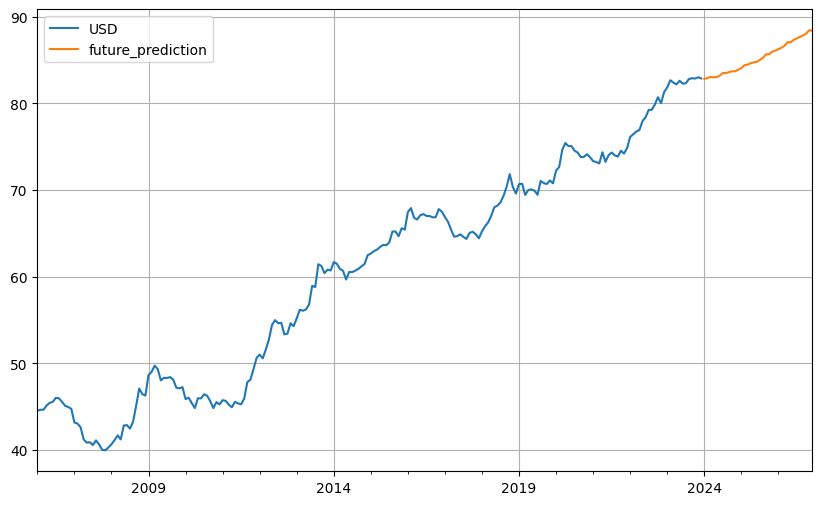

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True)
df_month[['USD','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']

In [ ]:
filtered_df

,USD,USD_1,forecast_ARIMA,forcast_SARIMA_1,future_prediction
2023-01-01,81.852143,0.541052,80.235528,81.177332,NaN
2023-02-01,82.674500,0.822357,80.348638,81.423500,NaN
2023-03-01,82.400417,-0.274083,80.442912,81.499052,NaN
2023-04-01,82.191900,-0.208517,80.523235,81.795028,NaN
2023-05-01,82.619429,0.427529,80.591255,82.351254,NaN
2023-06-01,82.286167,-0.333262,80.648637,82.399951,NaN
2023-07-01,82.319591,0.033424,80.697166,82.632286,NaN
2023-08-01,82.803955,0.484364,80.738220,82.676783,NaN
2023-09-01,82.907667,0.103712,80.772925,82.883468,NaN
2023-10-01,82.869182,-0.038485,80.802268,82.937473,NaN


In [ ]:
df_month.to_csv("gdrive/My Drive/Colab Notebooks/Capstone/SARIMA_USD.csv", index=True)